# Black Box function
- Represents a generic function that we are trying to optimize
- In this case, we use 5 inputs each representing an experimental control

In [1]:
# This function is just a placeholder
# Proper functionality will open the CSV file and read the data input from test runs

def black_box_function(zStagePosition, flowRate, pressure, heaterSetpoint, substrateRotation, targetRotation, depositionTime, laserEnergy, laserSpotSize, laserRepetitionRate, coolingTime):
    """Function with unknown internals we wish to maximize.

    This is just serving as an example, for all intents and
    purposes think of the internals of this function, i.e.: the process
    which generates its output values, as unknown.

    The function takes in a number of parameters and returns a single value which will be deposition thickness.
    

    The current variables are:
    zStagePosition: float
        The position of the Z stage in mm.
    flowRate: float
        The flow rate in sccm.
    pressure: float
        The pressure in mTorr.
    heaterSetpoint: float
        The heater setpoint in °C.
    substrateRotation: float
        The rotation of the substrate in rpm.
    targetRotation: float
        The target rotation in rpm. 
    depositionTime: float
        The deposition time in min.
    laserEnergy: float
        The laser energy in mJ.
    laserSpotSize: float
        The laser spot size in mm^2.
    laserRepetitionRate: float
        The laser repetition rate in Hz.
    coolingTime: float
        The cooling time in min.
    """


    return (
    -zStagePosition * (2 * flowRate) ** 2
    - (pressure * heaterSetpoint - substrateRotation) ** 2 * targetRotation
    + (laserEnergy * laserSpotSize) * laserRepetitionRate * coolingTime * (2 * depositionTime) ** 2
    + 1
)



In [ ]:
from bayes_opt import BayesianOptimization
from bayes_opt import acquisition
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline


## This function will plot the output of changing a single variable
## while keeping the rest of the parameters constant.

def plot_black_box_over(var_name, var_range, fixed_params):
    x_vals = np.linspace(*var_range, 10000).reshape(-1, 1)
    y_vals = []

    for x in x_vals:
        args = fixed_params.copy()
        args[var_name] = x.item()
        y = black_box_function(**args)
        y_vals.append(y)


    plt.plot(x_vals, y_vals)
    plt.title(f"black_box_function output as '{var_name}' varies")
    plt.xlabel(var_name)
    plt.ylabel("Output")
    plt.grid(True)
    plt.show()



### Load Configs
- Configuration file is located in `config.json`
- File contains bounds for parameter input values and can be changed if necessary




In [ ]:
import json

# Bounds and configs are loaded in config file (config.json)
configPath = 'config.json'

# Load the full config data file
try:
    # Load the full config data file
    with open(configPath, 'r') as f:
        config = json.load(f)
        print(f"Loaded config: file from {configPath}")

    # Extract bounds for parameters
    pbounds = config['pbounds']

    ## Other parameters that can be loaded via config
    # optimizer_settings = config['optimizer_settings']
    # model_params = config['model_parameters']

    # Print usage
    print("Loaded config parameters:")
    print(json.dumps(config, indent=4))


except FileNotFoundError:
    print(f"Error: Could not find the config file at '{configPath}'. Please check the path and try again.")

except json.JSONDecodeError as e:
    print(f"Error: Failed to parse JSON in config file '{configPath}': {e}")

except Exception as e:
    print(f"An unexpected error occurred while loading the config file: {e}")



Loaded config: file from config/config.json
Loaded config parameters:
{
    "pbounds": {
        "zStagePosition": [
            0,
            51
        ],
        "flowRate": [
            0,
            10
        ],
        "pressure": [
            0,
            125
        ],
        "heaterSetpoint": [
            0,
            1000
        ],
        "substrateRotation": [
            0,
            30
        ],
        "targetRotation": [
            0,
            30
        ],
        "depositionTime": [
            0,
            1000
        ],
        "laserEnergy": [
            0,
            500
        ],
        "laserSpotSize": [
            0,
            5
        ],
        "laserRepetitionRate": [
            0,
            100
        ],
        "coolingTime": [
            0,
            1000
        ]
    },
    "optimizer_settings": {
        "init_points": 5,
        "n_iter": 25,
        "acq": "ei"
    },
    "model_parameters": {
        "learning_ra

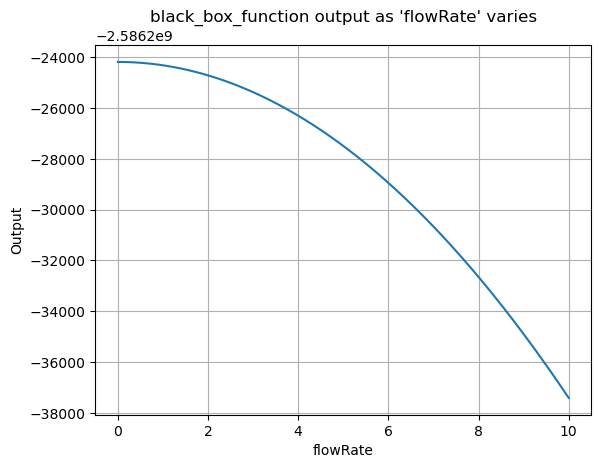

In [ ]:
import pandas as pd


## Below is a dictionary that maps the human-readable names of the parameters to their corresponding parameter names in the function
readable_to_param = {
    "Z-Stage Position (mm)": "zStagePosition",
    "Flow Rate (sccm)": "flowRate",
    "Pressure (mTorr)": "pressure",
    "Heater Setpoint (C)": "heaterSetpoint",
    "Substrate Rotation (RPM)": "substrateRotation",
    "Target Rotation (RPM)": "targetRotation",
    "Deposition Time (min)": "depositionTime",
    "Laser Energy (mJ)": "laserEnergy",
    "Laser Spot Size (mm^2)": "laserSpotSize",
    "Laser Repetition Rate (Hz)": "laserRepetitionRate",
    "Cooling Time (min)": "coolingTime"
}

# Specify file path for the experimental data to load from
# this should be either a CSV or an Excel file

file_path = "data.xlsx"  



# Load the specified file here
if file_path.endswith('.csv'):
    df = pd.read_csv(file_path)
elif file_path.endswith('.xlsx'):
    df = pd.read_excel(file_path)
else:
    raise ValueError("Unsupported file format. Use .csv or .xlsx")


# Map dictionary keys to the columns in the dataframe
mapped_cols = {col: readable_to_param[col] for col in df.columns if col in readable_to_param}
df.rename(columns=mapped_cols, inplace=True)

# Filter out only the needed param columns
df = df[list(readable_to_param.values())]

# Convert the first row to a dict of float values
params = df.iloc[0].astype(float).to_dict()


#TODO: have parameter loading iterate through all rows until the end
# If last row has no output value 
   #-> send message awaiting input from experiment
# If all values are filled
    # -> load the last row as parameters
    # -> perform the optimization
    # -> fill the following row with the next set of suggested parameters




# This is a placeholder for inputting parameter data
# the actual data will be read from a CSV file
# params = {
#     'zStagePosition': 33,   # From pbounds 'a': (2, 4)
#     'flowRate': 10,   # This will vary
#     'pressure': 35,  # From pbounds 'c': (-8, 3)
#     'heaterSetpoint': 600,
#     'substrateRotation': 10,
#     'targetRotation': 10,
#     'depositionTime': 60,
#     'laserEnergy': 235,
#     'laserSpotSize': 2.83,
#     'laserRepetitionRate': 10,
#     'coolingTime': 19
# }



plot_black_box_over('flowRate', (0, 10), fixed_params=params)


In [27]:
# This will fail if the bayes_opt module is not installed
# you can install it by opening and running the environmentsetup.ipynb file

from bayes_opt import BayesianOptimization

### Set boundaries for input parameters
- These are allowable entries for experimental control variables
- In this case, we have arbitrary values selected for each input

In [28]:
optimizer = BayesianOptimization(
    f=black_box_function, # sets function for optimization to our defined function above
    pbounds=pbounds,# sets the bounds for each of the parameters to above set values
    verbose=2,# verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    random_state=1,
)

In [29]:
optimizer.maximize(
    init_points=5,
    n_iter=3, 
)

|   iter    |  target   | coolin... | deposi... | flowRate  | heater... | laserE... | laserR... | laserS... | pressure  | substr... | target... | zStage... |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | 5.434e+11 | 417.0     | 720.3     | 0.001144  | 302.3     | 73.38     | 9.234     | 0.9313    | 43.2      | 11.9      | 16.16     | 21.38     |
| 2         | 4.477e+12 | 685.2     | 204.5     | 8.781     | 27.39     | 335.2     | 41.73     | 2.793     | 17.55     | 5.943     | 24.02     | 49.38     |
| 3         | -3.708e+1 | 313.4     | 692.3     | 8.764     | 894.6     | 42.52     | 3.905     | 0.8492    | 109.8     | 2.95      | 12.63     | 48.85     |
| 4         | 2.862e+12 | 533.2     | 691.9     | 3.155     | 686.5     | 417.3     | 1.829     | 3.751     | 123.6     | 22.44     | 8.413     | 40.25     |
| 5         | 1.006e+10 | 103.2     | 447.9     | 9.

The best combination of parameters and target value found can be accessed via the property `bo.max`.

In [30]:
print(optimizer.max)

{'target': np.float64(4477286232235.03), 'params': {'coolingTime': np.float64(685.2195003967595), 'depositionTime': np.float64(204.45224973151744), 'flowRate': np.float64(8.781174363909454), 'heaterSetpoint': np.float64(27.387593197926165), 'laserEnergy': np.float64(335.2337550892011), 'laserRepetitionRate': np.float64(41.730480236712694), 'laserSpotSize': np.float64(2.7934491422287584), 'pressure': np.float64(17.54836732440422), 'substrateRotation': np.float64(5.943044672546364), 'targetRotation': np.float64(24.0223370602661), 'zStagePosition': np.float64(49.381340361689276)}}


While the list of all parameters probed and their corresponding target values is available via the property `bo.res`.


In [31]:
for i, res in enumerate(optimizer.res):
    print("Iteration {}: \n\t{}".format(i, res))

Iteration 0: 
	{'target': np.float64(543401135248.8061), 'params': {'coolingTime': np.float64(417.022004702574), 'depositionTime': np.float64(720.3244934421581), 'flowRate': np.float64(0.0011437481734488664), 'heaterSetpoint': np.float64(302.33257263183975), 'laserEnergy': np.float64(73.37794540855653), 'laserRepetitionRate': np.float64(9.233859476879779), 'laserSpotSize': np.float64(0.9313010568883545), 'pressure': np.float64(43.19509088038097), 'substrateRotation': np.float64(11.903024226920099), 'targetRotation': np.float64(16.16450202010071), 'zStagePosition': np.float64(21.378920234568035)}}
Iteration 1: 
	{'target': np.float64(4477286232235.03), 'params': {'coolingTime': np.float64(685.2195003967595), 'depositionTime': np.float64(204.45224973151744), 'flowRate': np.float64(8.781174363909454), 'heaterSetpoint': np.float64(27.387593197926165), 'laserEnergy': np.float64(335.2337550892011), 'laserRepetitionRate': np.float64(41.730480236712694), 'laserSpotSize': np.float64(2.793449142

In [32]:
optimizer.set_bounds(new_bounds={'a': (-2, 3)})

In [33]:
optimizer.maximize(
    init_points=0,
    n_iter=5,
)

|   iter    |  target   | coolin... | deposi... | flowRate  | heater... | laserE... | laserR... | laserS... | pressure  | substr... | target... | zStage... |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
| 9         | 1.21e+13  | 377.3     | 448.0     | 4.168     | 253.1     | 131.0     | 76.43     | 3.989     | 39.99     | 19.75     | 16.72     | 45.71     |
| 10        | 2.053e+11 | 990.4     | 39.31     | 2.165     | 171.3     | 156.7     | 57.97     | 3.695     | 15.36     | 13.16     | 24.96     | 17.18     |
| 11        | 1.083e+12 | 305.2     | 189.4     | 4.384     | 649.4     | 177.4     | 88.92     | 1.68      | 119.5     | 21.06     | 12.89     | 15.42     |
| 12        | 7.38e+10  | 274.3     | 162.3     | 4.495     | 358.6     | 115.2     | 24.67     | 0.9375    | 47.52     | 10.78     | 11.08     | 17.91     |
| 13        | 1.214e+13 | 296.1     | 489.4     | 6.

## 3. Guiding the optimization

It is often the case that we have an idea of regions of the parameter space where the maximum of our function might lie. For these situations the `BayesianOptimization` object allows the user to specify specific points to be probed. By default these will be explored lazily (`lazy=True`), meaning these points will be evaluated only the next time you call `maximize`. This probing process happens before the gaussian process takes over.

Parameters can be passed as dictionaries such as below:

In [34]:
optimizer.probe(
    params={"a":1, "b":-1, "c":-5, "d":3, "e":0},
    lazy=True,
)

In [11]:
print(optimizer.space.keys)

['a', 'b', 'c', 'd', 'e']


In [12]:
optimizer.probe(
    params=[1, -1, -5, 3, 0],
    lazy=True,
)

In [13]:
optimizer.maximize(
    init_points=0,
    n_iter=0,
)

|   iter    |  target   |     a     |     b     |     c     |     d     |     e     |
-------------------------------------------------------------------------------------
| 14        | -3.0      | 1.0       | -1.0      | -5.0      | 3.0       | 0.0       |
| 15        | -3.0      | 1.0       | -1.0      | -5.0      | 3.0       | 0.0       |


In [ ]:

def plot_constrained_opt(pbounds, target_function, optimizer):
    """
    Plots a number of interesting contours to visualize constrained 2-dimensional optimization.
    """

    # Set a few parameters
    n_constraints = optimizer.constraint.lb.size
    n_plots_per_row = 2+n_constraints

    # Construct the subplot titles
    if n_constraints==1:
        c_labels = ["constraint"]
    else:
        c_labels = [f"constraint {i+1}" for i in range(n_constraints)]
    labels_top = ["target"] + c_labels + ["masked target"]
    labels_bot = ["target estimate"] + [c + " estimate" for c in c_labels] + ["acquisition function"]
    labels = [labels_top, labels_bot]

    # Setup the grid to plot on
    x = np.linspace(pbounds['x'][0], pbounds['x'][1], 1000)
    y = np.linspace(pbounds['y'][0], pbounds['y'][1], 1000)
    xy = np.array([[x_i, y_j] for y_j in y for x_i in x])
    X, Y = np.meshgrid(x, y)

    # Evaluate the actual functions on the grid
    Z = target_function(X, Y)
    # This reshaping is a bit painful admittedly, but it's a consequence of np.meshgrid
    C = optimizer.constraint.fun(X, Y).reshape((n_constraints,) + Z.shape).swapaxes(0, -1)


    fig, axs = plt.subplots(2, n_plots_per_row, constrained_layout=True, figsize=(12,8))

    for i in range(2):
        for j in range(n_plots_per_row):
            axs[i, j].set_aspect("equal")
            axs[i, j].set_title(labels[i][j])


    # Extract & unpack the optimization results
    max_ = optimizer.max
    res = optimizer.res
    x_ = np.array([r["params"]['x'] for r in res])
    y_ = np.array([r["params"]['y'] for r in res])
    c_ = np.array([r["constraint"] for r in res])
    a_ = np.array([r["allowed"] for r in res])


    Z_est = optimizer._gp.predict(xy).reshape(Z.shape)
    C_est = optimizer.constraint.approx(xy).reshape(Z.shape + (n_constraints,))
    P_allowed = optimizer.constraint.predict(xy).reshape(Z.shape)

    Acq = np.where(Z_est >0, Z_est * P_allowed, Z_est / (0.5 + P_allowed))


    target_vbounds = np.min([Z, Z_est]), np.max([Z, Z_est])
    constraint_vbounds = np.min([C, C_est]), np.max([C, C_est])


    axs[0,0].contourf(X, Y, Z, cmap=plt.cm.coolwarm, vmin=target_vbounds[0], vmax=target_vbounds[1])
    for i in range(n_constraints):
        axs[0,1+i].contourf(X, Y, C[:,:,i], cmap=plt.cm.coolwarm, vmin=constraint_vbounds[0], vmax=constraint_vbounds[1])
    Z_mask = Z

    Z_mask[~np.squeeze(optimizer.constraint.allowed(C))] = np.nan
    axs[0,n_plots_per_row-1].contourf(X, Y, Z_mask, cmap=plt.cm.coolwarm, vmin=target_vbounds[0], vmax=target_vbounds[1])

    axs[1,0].contourf(X, Y, Z_est, cmap=plt.cm.coolwarm, vmin=target_vbounds[0], vmax=target_vbounds[1])
    for i in range(n_constraints):
        axs[1,1+i].contourf(X, Y, C_est[:, :, i], cmap=plt.cm.coolwarm, vmin=constraint_vbounds[0], vmax=constraint_vbounds[1])
    axs[1,n_plots_per_row-1].contourf(X, Y, Acq, cmap=plt.cm.coolwarm, vmin=0, vmax=1)

    for i in range(2):
        for j in range(n_plots_per_row):
            axs[i,j].scatter(x_[a_], y_[a_], c='white', s=80, edgecolors='black')
            axs[i,j].scatter(x_[~a_], y_[~a_], c='red', s=80, edgecolors='black')
            axs[i,j].scatter(max_["params"]['x'], max_["params"]['y'], s=80, c='green', edgecolors='black')

    return fig, axs

plot_constrained_opt(pbounds, target_function, optimizer);

NameError: name 'target_function' is not defined

## 2. Getting Started

All we need to get started is to instantiate a `BayesianOptimization` object specifying a function to be optimized `f`, and its parameters with their corresponding bounds, `pbounds`. This is a constrained optimization technique, so you must specify the minimum and maximum values that can be probed for each parameter in order for it to work

In [14]:
from bayes_opt.logger import JSONLogger
from bayes_opt.event import Events

The observer paradigm works by:
1. Instantiating an observer object.
2. Tying the observer object to a particular event fired by an optimizer.

The `BayesianOptimization` object fires a number of internal events during optimization, in particular, every time it probes the function and obtains a new parameter-target combination it will fire an `Events.OPTIMIZATION_STEP` event, which our logger will listen to.

**Caveat:** The logger will not look back at previously probed points.

In [15]:
logger = JSONLogger(path="./logs/output-log.json")
optimizer.subscribe(Events.OPTIMIZATION_STEP, logger)

In [16]:
optimizer.maximize(
    init_points=2,
    n_iter=3,
)

|   iter    |  target   |     a     |     b     |     c     |     d     |     e     |
-------------------------------------------------------------------------------------
| 16        | -709.1    | 2.473     | -2.49     | -7.57     | 0.8492    | 1.513     |
| 17        | 2.313     | -1.508    | -0.4734   | 2.537     | 2.666     | 0.7675    |
| 18        | -454.3    | -0.457    | -2.938    | -3.433    | 4.582     | 1.354     |
| 19        | -221.5    | -0.1408   | -1.262    | -2.872    | 0.9391    | -1.961    |
| 20        | -86.93    | 1.965     | -2.702    | 2.937     | 0.00245   | 0.9418    |


In [17]:
from bayes_opt.util import load_logs

In [18]:
new_optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    verbose=2,
    random_state=7,
)
print(len(new_optimizer.space))

0


In [19]:
load_logs(new_optimizer, logs=["./logs/output-log.json"])

/opt/anaconda3/envs/bayop/lib/python3.12/site-packages/bayes_opt/bayesian_optimization.py:236: UserWarning: 
Data point [-1.50826583 -0.47335425  2.53678483  2.66582642  0.76750846] is outside the bounds of the parameter space. 
  self._space.register(params, target, constraint_value)
/opt/anaconda3/envs/bayop/lib/python3.12/site-packages/bayes_opt/bayesian_optimization.py:236: UserWarning: 
Data point [-0.45701499 -2.93819745 -3.43338351  4.58166153  1.3539277 ] is outside the bounds of the parameter space. 
  self._space.register(params, target, constraint_value)
/opt/anaconda3/envs/bayop/lib/python3.12/site-packages/bayes_opt/bayesian_optimization.py:236: UserWarning: 
Data point [-0.14083436 -1.26232533 -2.87175052  0.93911254 -1.96086536] is outside the bounds of the parameter space. 
  self._space.register(params, target, constraint_value)
/opt/anaconda3/envs/bayop/lib/python3.12/site-packages/bayes_opt/bayesian_optimization.py:236: UserWarning: 
Data point [ 1.96508147e+00 -2.70

In [20]:
print("New optimizer is now aware of {} points of data.".format(len(new_optimizer.space)))

New optimizer is now aware of 5 points of data.


In [43]:
new_optimizer.maximize(
    init_points=0,
    n_iter=10,
)



NameError: name 'new_optimizer' is not defined

Use Pandas for conversion between CSV and JSON files

In [23]:
import pandas as pd
def convert_json_to_readable_csv(json_file_path, csv_file_path):

    """
    This function converts a JSON file to a readable CSV file with proper formatting and column names.
    """
    #import JSON as a dataframe
    data = pd.read_json(json_file_path, lines=True)

    #flatten nested JSON fields
    data = pd.json_normalize(data.to_dict(orient="records"))


    ## Below is an optional step to clean up the data and export it as a CSV file
    # Rename columns for readability
    data.rename(columns={
        'target': 'Target Value',
        'params.a': 'A',
        'params.b': 'B',
        'params.c': 'C',
        'params.d': 'D',
        'params.e': 'E',
        'datetime.datetime': 'Timestamp',
        'datetime.elapsed': 'Elapsed Time (s)',
        'datetime.delta': 'Time Delta (s)'
    }, inplace=True)

    # Format the Timestamp to a more readable format if necessary
    data['Timestamp'] = pd.to_datetime(data['Timestamp']).dt.strftime('%Y-%m-%d %H:%M:%S')

    # Example to round numeric values to improve readability
    data['Target Value'] = data['Target Value'].round(2)
    data['A'] = data['A'].round(2)
    data['B'] = data['B'].round(2)
    data['C'] = data['C'].round(2)
    data['D'] = data['D'].round(2)
    data['E'] = data['E'].round(2)
    data['Elapsed Time (s)'] = data['Elapsed Time (s)'].round(3)
    data['Time Delta (s)'] = data['Time Delta (s)'].round(3)

    #save dataframe to CSV
    data.to_csv(csv_file_path, index=False)

    print("JSON Log data has been exported as a CSV file to: {}".format(csv_file_path))



In [24]:
convert_json_to_readable_csv("./logs/output-log.json", "./logs/output-log.csv")

JSON Log data has been exported as a CSV file to: ./logs/output-log.csv


In [ ]:
#TODO: Add conversion of JSON to CSV file
#TODO: Add code to plot the data (aquisition function file has instructions)
#TODO: Add code to save the plot as an image file
#TODO: Add code to save the plot as an interactive HTML file

